# Лекция 4. Оценка взаимосвязи показателей

## Корреляционное отношение

При анализе данных очень часто приходится оценивать насколько значение одного показателя зависит от значения другого.

В статистике для этих целей разработано много различных подходов. Прежде, чем мы начнем их рассматривать, важно указать, что в статистическом анализе изучаются не все виды зависимостей.

Например, **функциональные зависимости** между переменными изучают в математическом анализе, в классической физике. Если переменная $y$ функционально зависит от переменной $x$, то это означает, что если сейчас при $x=1$ $y=6$, то это будет и завтра, и вообще всегда. 
Статистическая взаимосвязь между переменными напротив не проявляется в каждом отдельном случае, иногда могут быть существенные отклонения, иногда не очень существенные. Про такую взаимосвязь можно говорить, что на большом числе данных в среднем будет наблюдаться  взаимосвязь. Например, известно, что в среднем при увеличении объема производства товара его себестоимость снижается. 

Как мы уже выяснили, при группировке данных по переменной $x$ внутри каждой группы вариабельность признака $x$ уменьшается. Рассмотрим этот вопрос подробнее. Возьмем для этих целей один из датасетов библиотеки pydataset - Computers, в котором отражены статистические зависимости между ценой компьютера, его скоростью, объемом оперативной памяти, объемом винчестера и т.д. Выполним предварительный визуальный анализ зависимости между ценой и объемом оперативной памяти:

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,no,no,yes,39,35
6256,2223,66,850,16,15,yes,yes,yes,39,35
6257,2654,100,1200,24,15,yes,no,yes,39,35
6258,2195,100,850,16,15,yes,no,yes,39,35


<AxesSubplot:xlabel='price', ylabel='ram'>

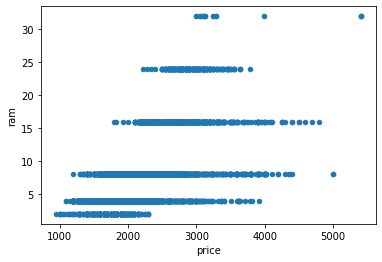

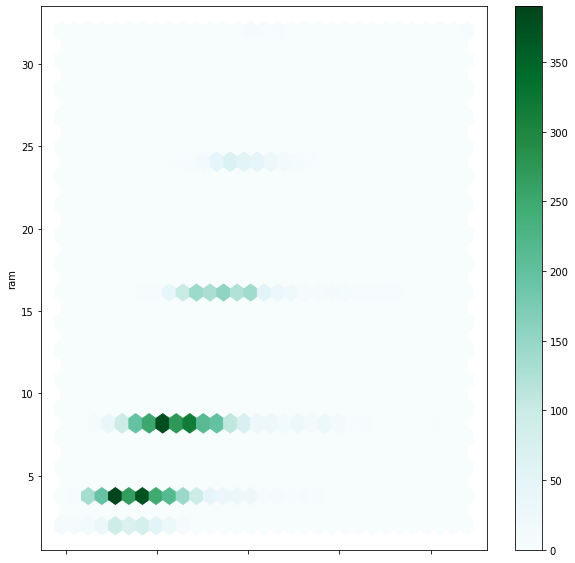

In [1]:
import pydataset as ds

G=ds.data('Computers')
display(G)
G.plot.scatter(x='price', y='ram')
G.plot.hexbin(x='price', y='ram', gridsize=30, figsize=(10,10))

Кстати, весь состав библиотеки pydataset можно получить, выполнив перевод ds.data().iloc[i].title здесь же в python с помощью google translate. Для этогj нужно установить библиотеку googletrans:

> pip3 install googletrans

Далее порядок действий следующий (показан перевод первых 20 датасетов):

In [53]:
from googletrans import Translator
import pandas as pd
translator = Translator()

for i in range(21):
    print('Номер:'+str(i)+'; dataset_id: '+ds.data().iloc[i].dataset_id+'; Название: '+translator.translate(ds.data().iloc[i].title,src='en', dest='ru').text)

Номер:0; dataset_id: AirPassengers; Название: Ежемесячные номера пассажиров авиакомпании 1949-1960
Номер:1; dataset_id: BJsales; Название: Данные по продажам с лидирующим индикатором
Номер:2; dataset_id: BOD; Название: Биохимический спрос на кислород
Номер:3; dataset_id: Formaldehyde; Название: Определение формальдегида
Номер:4; dataset_id: HairEyeColor; Название: Волосы и глазные статистики Студенты
Номер:5; dataset_id: InsectSprays; Название: Эффективность распылителей насекомых
Номер:6; dataset_id: JohnsonJohnson; Название: Ежеквартальная прибыль на Джонсон и Джонсон Доля
Номер:7; dataset_id: LakeHuron; Название: Уровень озера Гурон 1875-1972
Номер:8; dataset_id: LifeCycleSavings; Название: Межстрановые сберегательные данные жизненного цикла
Номер:9; dataset_id: Nile; Название: Поток реки Нил
Номер:10; dataset_id: OrchardSprays; Название: Потенция спрей сада
Номер:11; dataset_id: PlantGrowth; Название: Результаты эксперимента по росту растений
Номер:12; dataset_id: Puromycin; Назван

Рассмотрим гистограмму и ящик с усами цены:

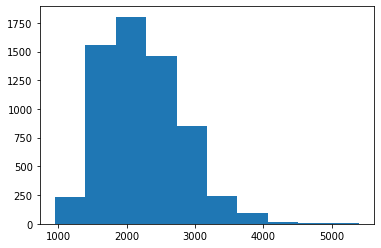

<AxesSubplot:>

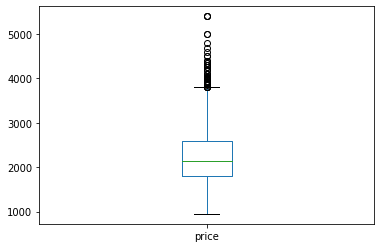

In [82]:
from matplotlib import pyplot as plt
gg=(plt.hist(G['price']))
group=[list(gg[0]),list(gg[1])]
plt.show()
G['price'].plot.box()


In [8]:
group

[[237.0, 1554.0, 1803.0, 1459.0, 850.0, 238.0, 92.0, 18.0, 3.0, 5.0],
 [949.0,
  1394.0,
  1839.0,
  2284.0,
  2729.0,
  3174.0,
  3619.0,
  4064.0,
  4509.0,
  4954.0,
  5399.0]]

Ящик с усами показывает на существенные отклонения от центральной тенденции в правом хвосте. Соответственно по коэффициенту вариации статистическая совокупность близка к неоднородной:

In [83]:
kv=100*G['price'].std()/G['price'].mean()
kv

26.167330882798556

При группировке всего у нас получилось 10 групп компьютеров. Рассчитаем средние значения и показатели вариции внутри каждой группы, запомним значения каждой группы в списке data_group:

In [84]:
import pandas as pd
import math
st_group = pd.DataFrame(columns = ["Внут.средняя",  "Внутригрупповая дисперсия","Вес группы", "Коэф.вар."])
data_group=[]
for i in range(len(group[0])):
    data_group.append(G[(group[1][i]<=G['price']) & (G['price']<=group[1][i + 1])]['price'])
    Avg_in = data_group[i].mean()
    D_in=data_group[i].std()**2
    Kv_in = math.sqrt(D_in)/Avg_in*100
    st_group = st_group.append(pd.Series([Avg_in, D_in, len(data_group[i]), Kv_in], index = st_group.columns),ignore_index=True)
display(st_group)


,Внут.средняя,Внутригрупповая дисперсия,Вес группы,Коэф.вар.
0,1276.316456,6626.293499,237.0,6.377889
1,1630.513149,17070.559358,1559.0,8.013082
2,2043.653910,15238.138757,1803.0,6.040301
3,2482.290212,17020.028048,1461.0,5.255664
4,2920.537647,14706.868428,850.0,4.152382
5,3356.920168,17687.643389,238.0,3.961813
6,3831.815217,14967.229216,92.0,3.192759
7,4276.611111,17242.133987,18.0,3.070406
8,4695.666667,10508.333333,3.0,2.183080
9,5239.000000,48000.000000,5.0,4.181886


Выполним расчет дисперсии признака "price" по всей совокупности $D=\sigma^2$:
$$D=\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2\cdot }{n}$$

In [30]:
D=G['price'].std()**2
D

337333.2349018309

Введем в рассмотрение понятия **внутригрупповая дисперсия и средняя внутригрупповая дисперсия**.

В таблице дата-фрейма st_group как раз рассчитана внутригрупповая дисперсия:
    $$\sigma_j^2=\frac{\sum_{i=1}^{n_j}(x_i-\overline{x}_j)^2}{n_j}$$
где $\sigma_j$ - внутригрупповая дисперсия $j$-й группы;
$n_j$ - количество элементов $j$-й группы;
$\overline{x}_j$ - среднее значение внутри группы;
$x_i$ - $i$-е значение внутри группы.

Понятие средняя внутригрупповая дисперсия вводится как средневзвешенная внутригрупповая дисперсия:
$$\overline{\sigma}^2=\frac{\sum_{j=1}^K \sigma_j^2\cdot n_j}{n}=\frac{\sum_{j=1}^K\sum_{i=1}^{n_j}(x_i-\overline{x}_j)^2}{\sum_{j=1}^K n_j}$$
где $K$ - количество групп, $\sum_{j=1}^K n_j=n$.

Ниже приведен расчет средней внутригрупповой дисперсии:

In [85]:
D_in_avg=(st_group['Внутригрупповая дисперсия']*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_in_avg

15830.422046899183

Значения показателей дисперсии внутри группы различаются, поэтому можно ввести понятие **межгрупповая дисперсия**, которая характеризует вариацию, обусловленную влиянием
фактора, положенного в основу группировки:
$$\delta^2=\frac{\sum_{j=1}^{K}(\overline{x}_j-\overline{x})^2}{\sum_{j=1}^K n_j}$$
где $\overline{x}$ - общая средняя, $\overline{x}_j$ - среднее арифметическое $j$-й группы.

Ниже проводится расчет межгрупповой дисперсии:

In [86]:
Mean=G['price'].mean()
D_out=(((st_group['Внут.средняя']-Mean)**2)*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_out

321299.1132872957

Оказывается справедливым следующее соотношение: общая дисперсия признака равна сумме межгрупповой и срердней межгрупповой дисперсиям:
 $$D=\overline{\sigma}^2+\delta^2$$

In [87]:
print(D_in_avg+D_out)
print(D)
print((D-(D_in_avg+D_out))/D*100)

337129.53533419484
337333.2349018309
0.060385264942942


Из расчетов видно, что ошибка составляет менее 0.1%

Из наших расчетов видно, что большую долю изменчивости всех данных вносит именно межгрупповая дисперсия. 
Поскольку в основу группировки был положен сам признак $x$, то это указывает, что группировка по этому признаку позволяет объяснить большую часть изменчивости всех данных. 

Это обстоятельство может быть  положено в основу оценки насколько группировка по одному признаку способна объяснить изменчивость данных по другому признаку.

Для этих целей вводится понятие **эмпирическое корреляционное отношение**:

$$1=\frac{\overline{\sigma}^2}{D}+\frac{\delta^2}{D}\Rightarrow \eta=\sqrt{\frac{\delta^2}{D}}=\sqrt{1-\frac{\overline{\sigma}^2}{D}}$$



Корреляционное отношение изменяется в изтервале $0\leq \eta\leq 1$. Чем ближе к 1 будет его
величина, тем сильнее взаимосвязь между группируемым признаком и признаком по которому проводилась группировка.

Ниже приведен расчет корреляционного отношения для нашего случая:

In [68]:
cor_relation=math.sqrt(D_out/D)
cor_relation

0.9759446731550618

Выполним теперь группировку цены (price) по объему оперативной памяти (ram) в рассматриваемом дата фрейме 'Computers'  

In [88]:
import numpy as np
group=np.histogram(G['ram'],5)
st_group = pd.DataFrame(columns = ["Внут.средняя",  "Внутригрупповая дисперсия","Вес группы", "Коэф.вар."])
data_group=[]
for i in range(len(group[0])):
    data_group.append(G[(group[1][i]<=G['ram']) & (G['ram']<=group[1][i + 1])]['price'])
    Avg_in = data_group[i].mean()
    D_in=data_group[i].std()**2
    Kv_in = math.sqrt(D_in)/Avg_in*100
    st_group = st_group.append(pd.Series([Avg_in, D_in, len(data_group[i]), Kv_in], index = st_group.columns),ignore_index=True)
display(st_group)


,Внут.средняя,Внутригрупповая дисперсия,Вес группы,Коэф.вар.
0,2058.783636,257131.883062,4950.0,24.630161
1,2298.154741,248072.910499,2320.0,21.672569
2,2782.691767,176754.434545,996.0,15.108455
3,2936.016835,76804.057148,297.0,9.439164
4,3612.062500,840078.195833,16.0,25.374915


Внутригрупповой кожффициент вариации невелик, поэтому можно надеяться на влияние группировки на изменчивость.

Проводим расчеты:
    
Общая дисперсия:

In [89]:
D=G['price'].std()**2
D

337333.2349018309

Средняя внутригрупповая дисперсия:

In [90]:
D_in_avg=(st_group['Внутригрупповая дисперсия']*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_in_avg

240194.8299835987

Межгрупповая дисперсия:

In [91]:
Mean=G['price'].mean()
D_out=(((st_group['Внут.средняя']-Mean)**2)*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
D_out

74787.8250806957

Корреляционное отношение:

In [92]:
cor_relation=math.sqrt(D_out/D)
cor_relation

0.4708535902679066

Полученное значение свидетельствует, что цена компьютера несильно зависит от объема его оперативной памяти (не является определяющей). На практике про сильную связь начинают говорить при корреляционном отношении более 0.7.

Важно, что корреляционное отношение оценивает именно силу связи, но не направление этой связи. Достоинством корреляционного отношения является то, что оно позволяет оценить связь между переменными при любом, даже нелинейном характере связи.

## Задание 1
Используя группировку по цене, выполнить расчет эмпирического корреляционного отношения для ram, speed, hd.